In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.isnull().sum() 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

In [74]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 

In [9]:
# Impute categorical variables with mode 
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Impute numerical variables with median
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

df.drop(['Name', 'Cabin'], axis=1, inplace=True) 

In [10]:
df.isnull().sum() 

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_list = {}
for column in categorical_columns:
    label = LabelEncoder()
    df[column] = label.fit_transform(df[column])
    label_list[column] = label    

In [13]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [14]:
import seaborn as sns

In [15]:
# for column in df.columns:
#     if column != 'Transported':  # Skip the target column itself
#         g = sns.FacetGrid(data=df, col=column, col_wrap=2, hue='Transported', height=4, sharex=False, sharey=False)
#         g.map(sns.histplot, column, kde=True, bins=25, alpha=0.2)
#         g.add_legend()  # Add legend to the grid
#         g.suptitle(f"Histogram of {column} Based on Transported", y=1.02, fontsize=16)
#         plt.tight_layout()
#         plt.show()

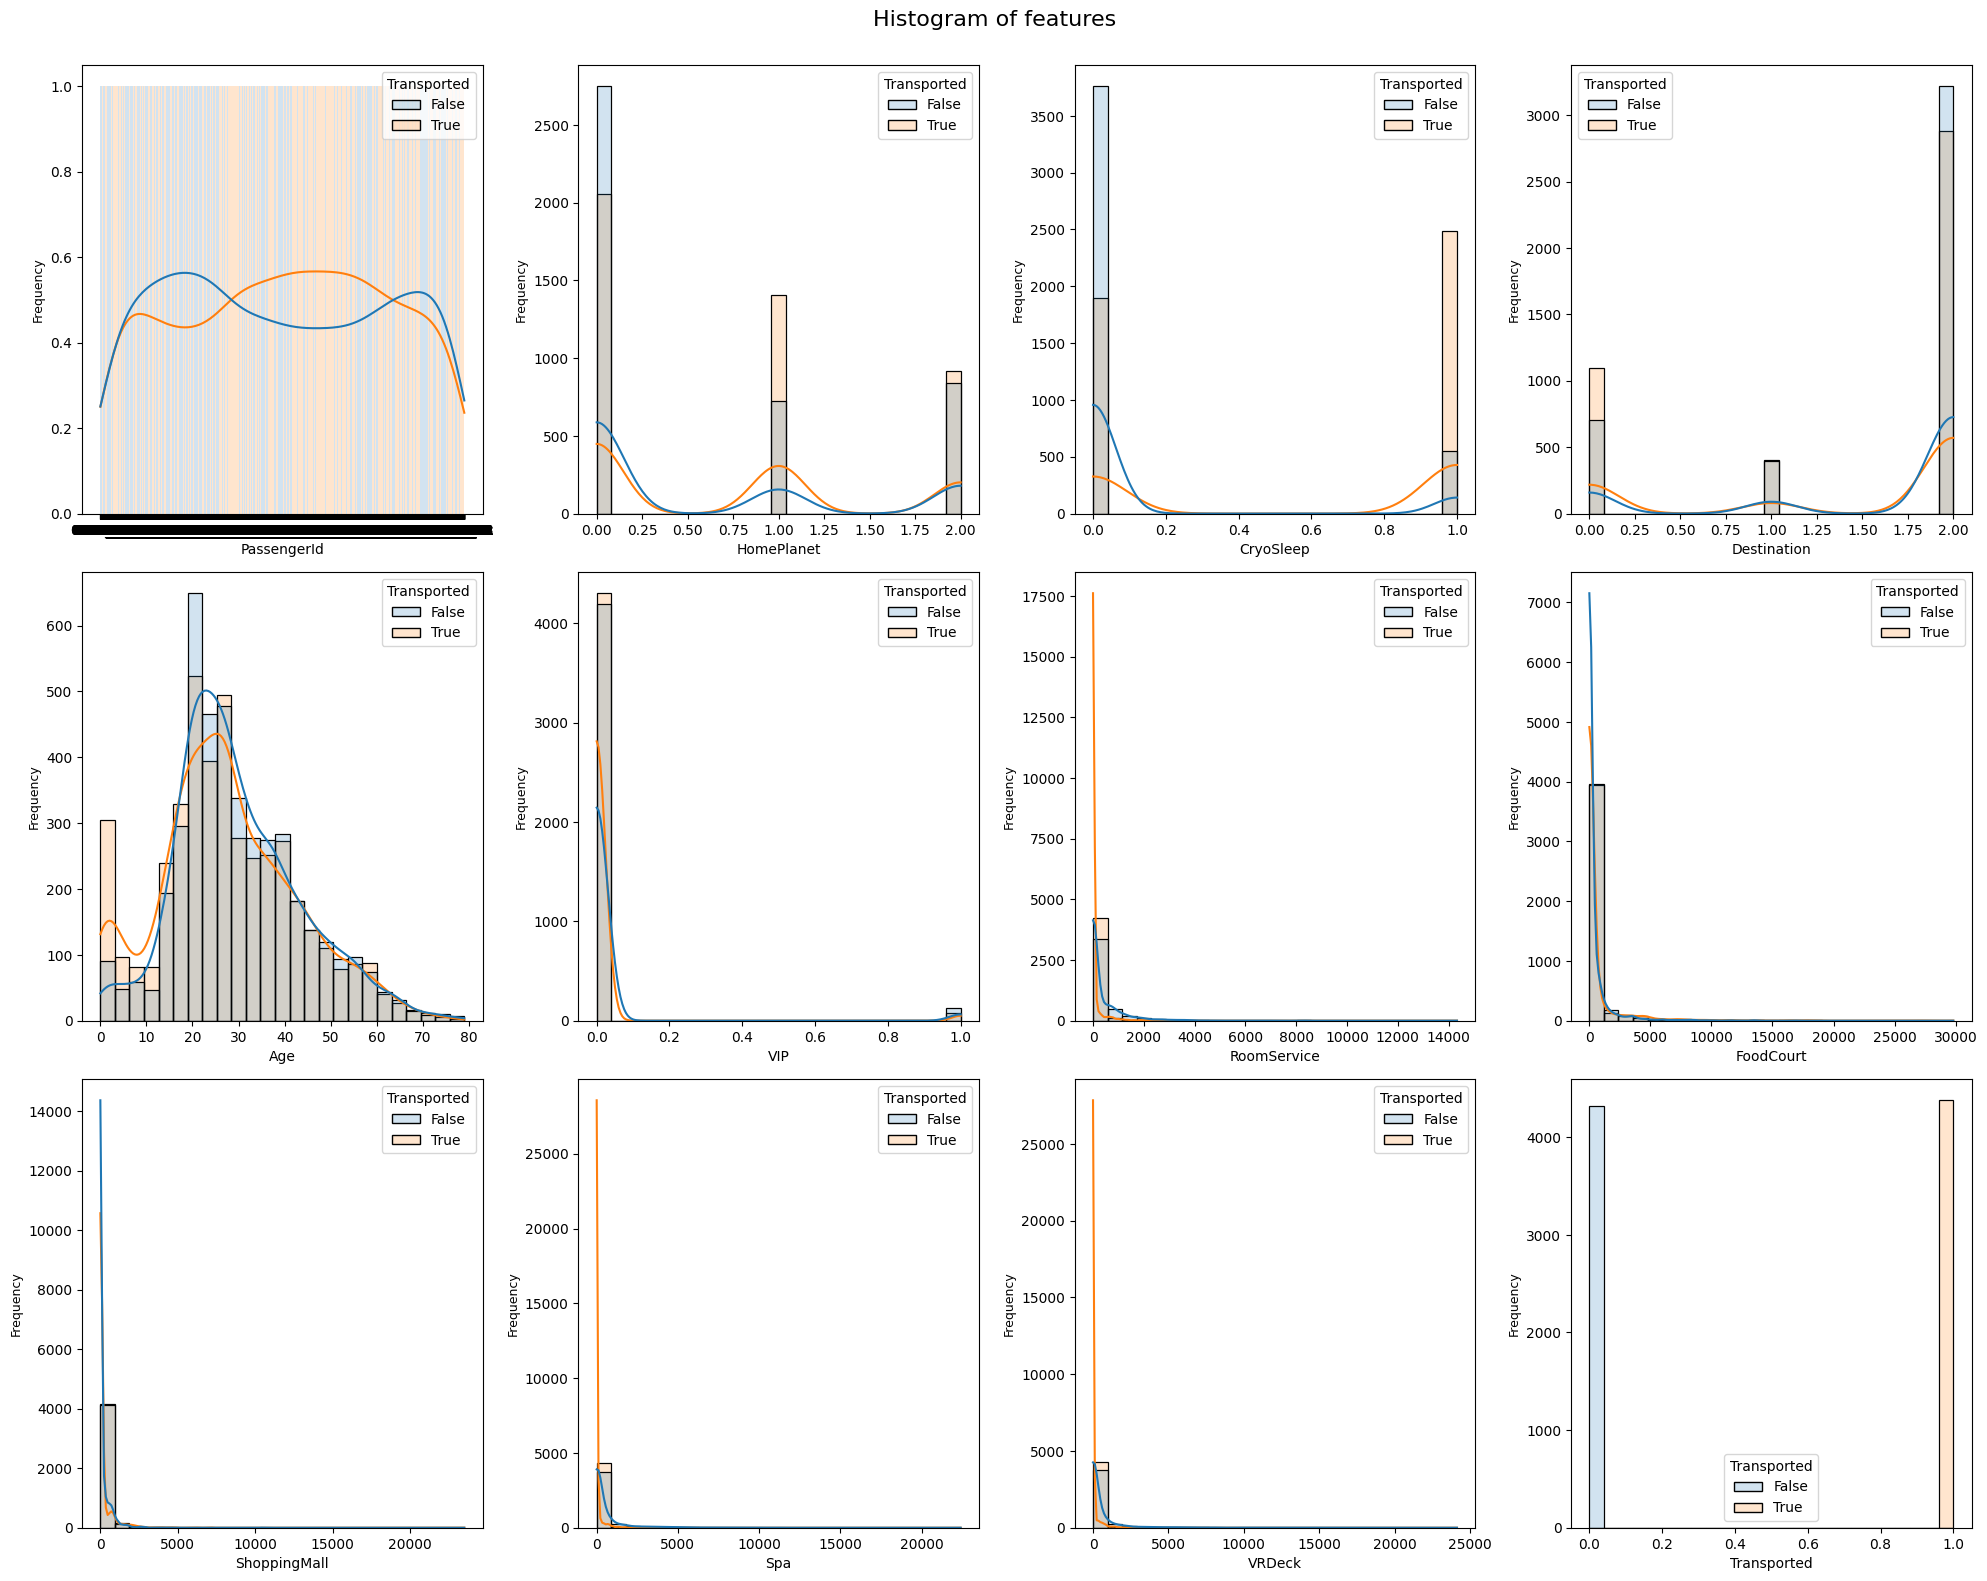

In [16]:
plt.figure(figsize=(20,20))
for index, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns)//4+1,4,index)
    sns.histplot(data=df, x=column, kde=True, bins=25, color='blue', alpha=0.2, hue='Transported')
    plt.xlabel(column,fontsize = 10)
    plt.ylabel('Frequency',fontsize=9)
plt.tight_layout() 
plt.suptitle('Histogram of features', y=1.02, fontsize=16)
plt.show()

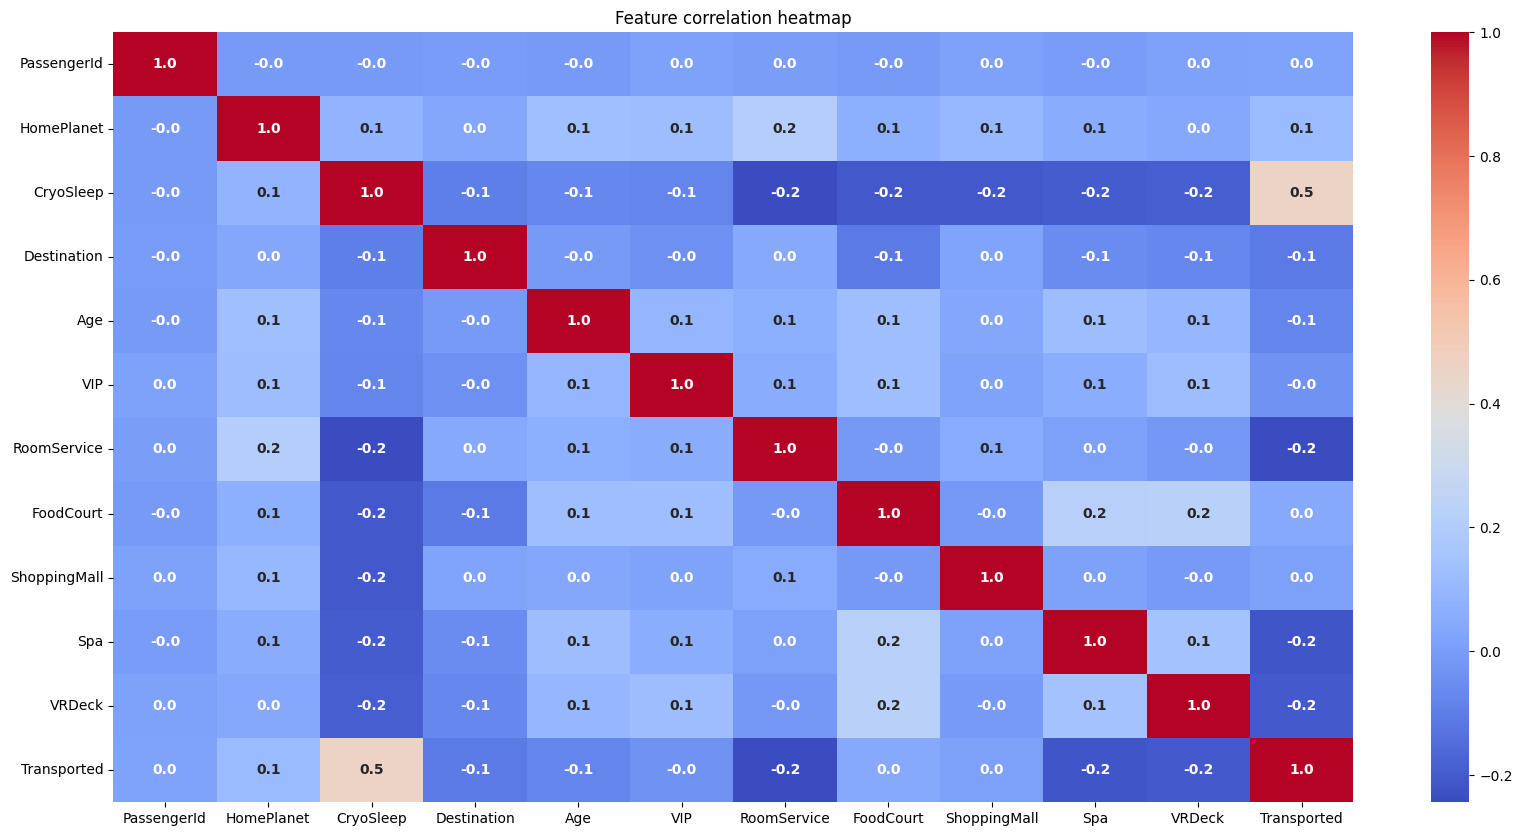

In [17]:
correlation_matrix = df. corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.1f', cbar=True, annot_kws={'fontweight':'bold'})
plt.title('Feature correlation heatmap')
plt.show()

In [18]:
correlation_with_transported = correlation_matrix['Transported']

In [19]:
strong_correlation = correlation_with_transported[(correlation_with_transported>=0.1) | (correlation_with_transported<=-.1)].index.tolist()

In [20]:
strong_correlation.remove('Transported')

In [21]:
X = df[strong_correlation]

In [22]:
y = df['Transported']

In [23]:
# whether balanced or not
y.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [ ]:
df2 = df.drop(columns=categorical_columns)

In [ ]:
df2.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True


In [79]:
X_plot = df2.iloc[:,[1,2,3,4,5,6]]

In [80]:
X_plot

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


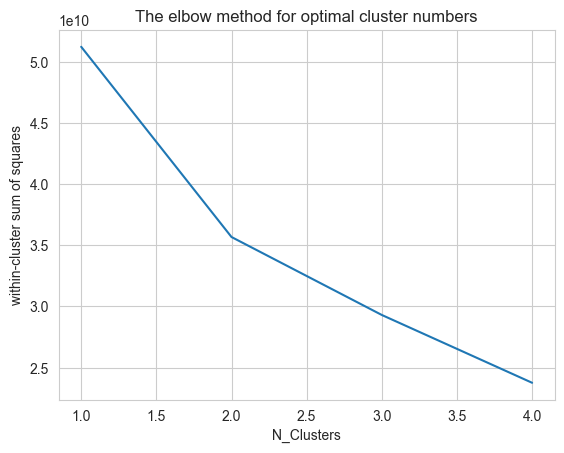

In [85]:
plt.plot(range(1,5),wcss)
plt.title('The elbow method for optimal cluster numbers')
plt.xlabel('N_Clusters')
plt.ylabel("within-cluster sum of squares")
plt.show()

In [84]:
#determining the optimal number for k-means classification
from sklearn.cluster import KMeans
wcss=[] #within-cluster sum of squares

for i in range(1,5):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=30000, n_init=10, random_state=42)
    kmeans.fit(X_plot)
    wcss.append(kmeans.inertia_)
    

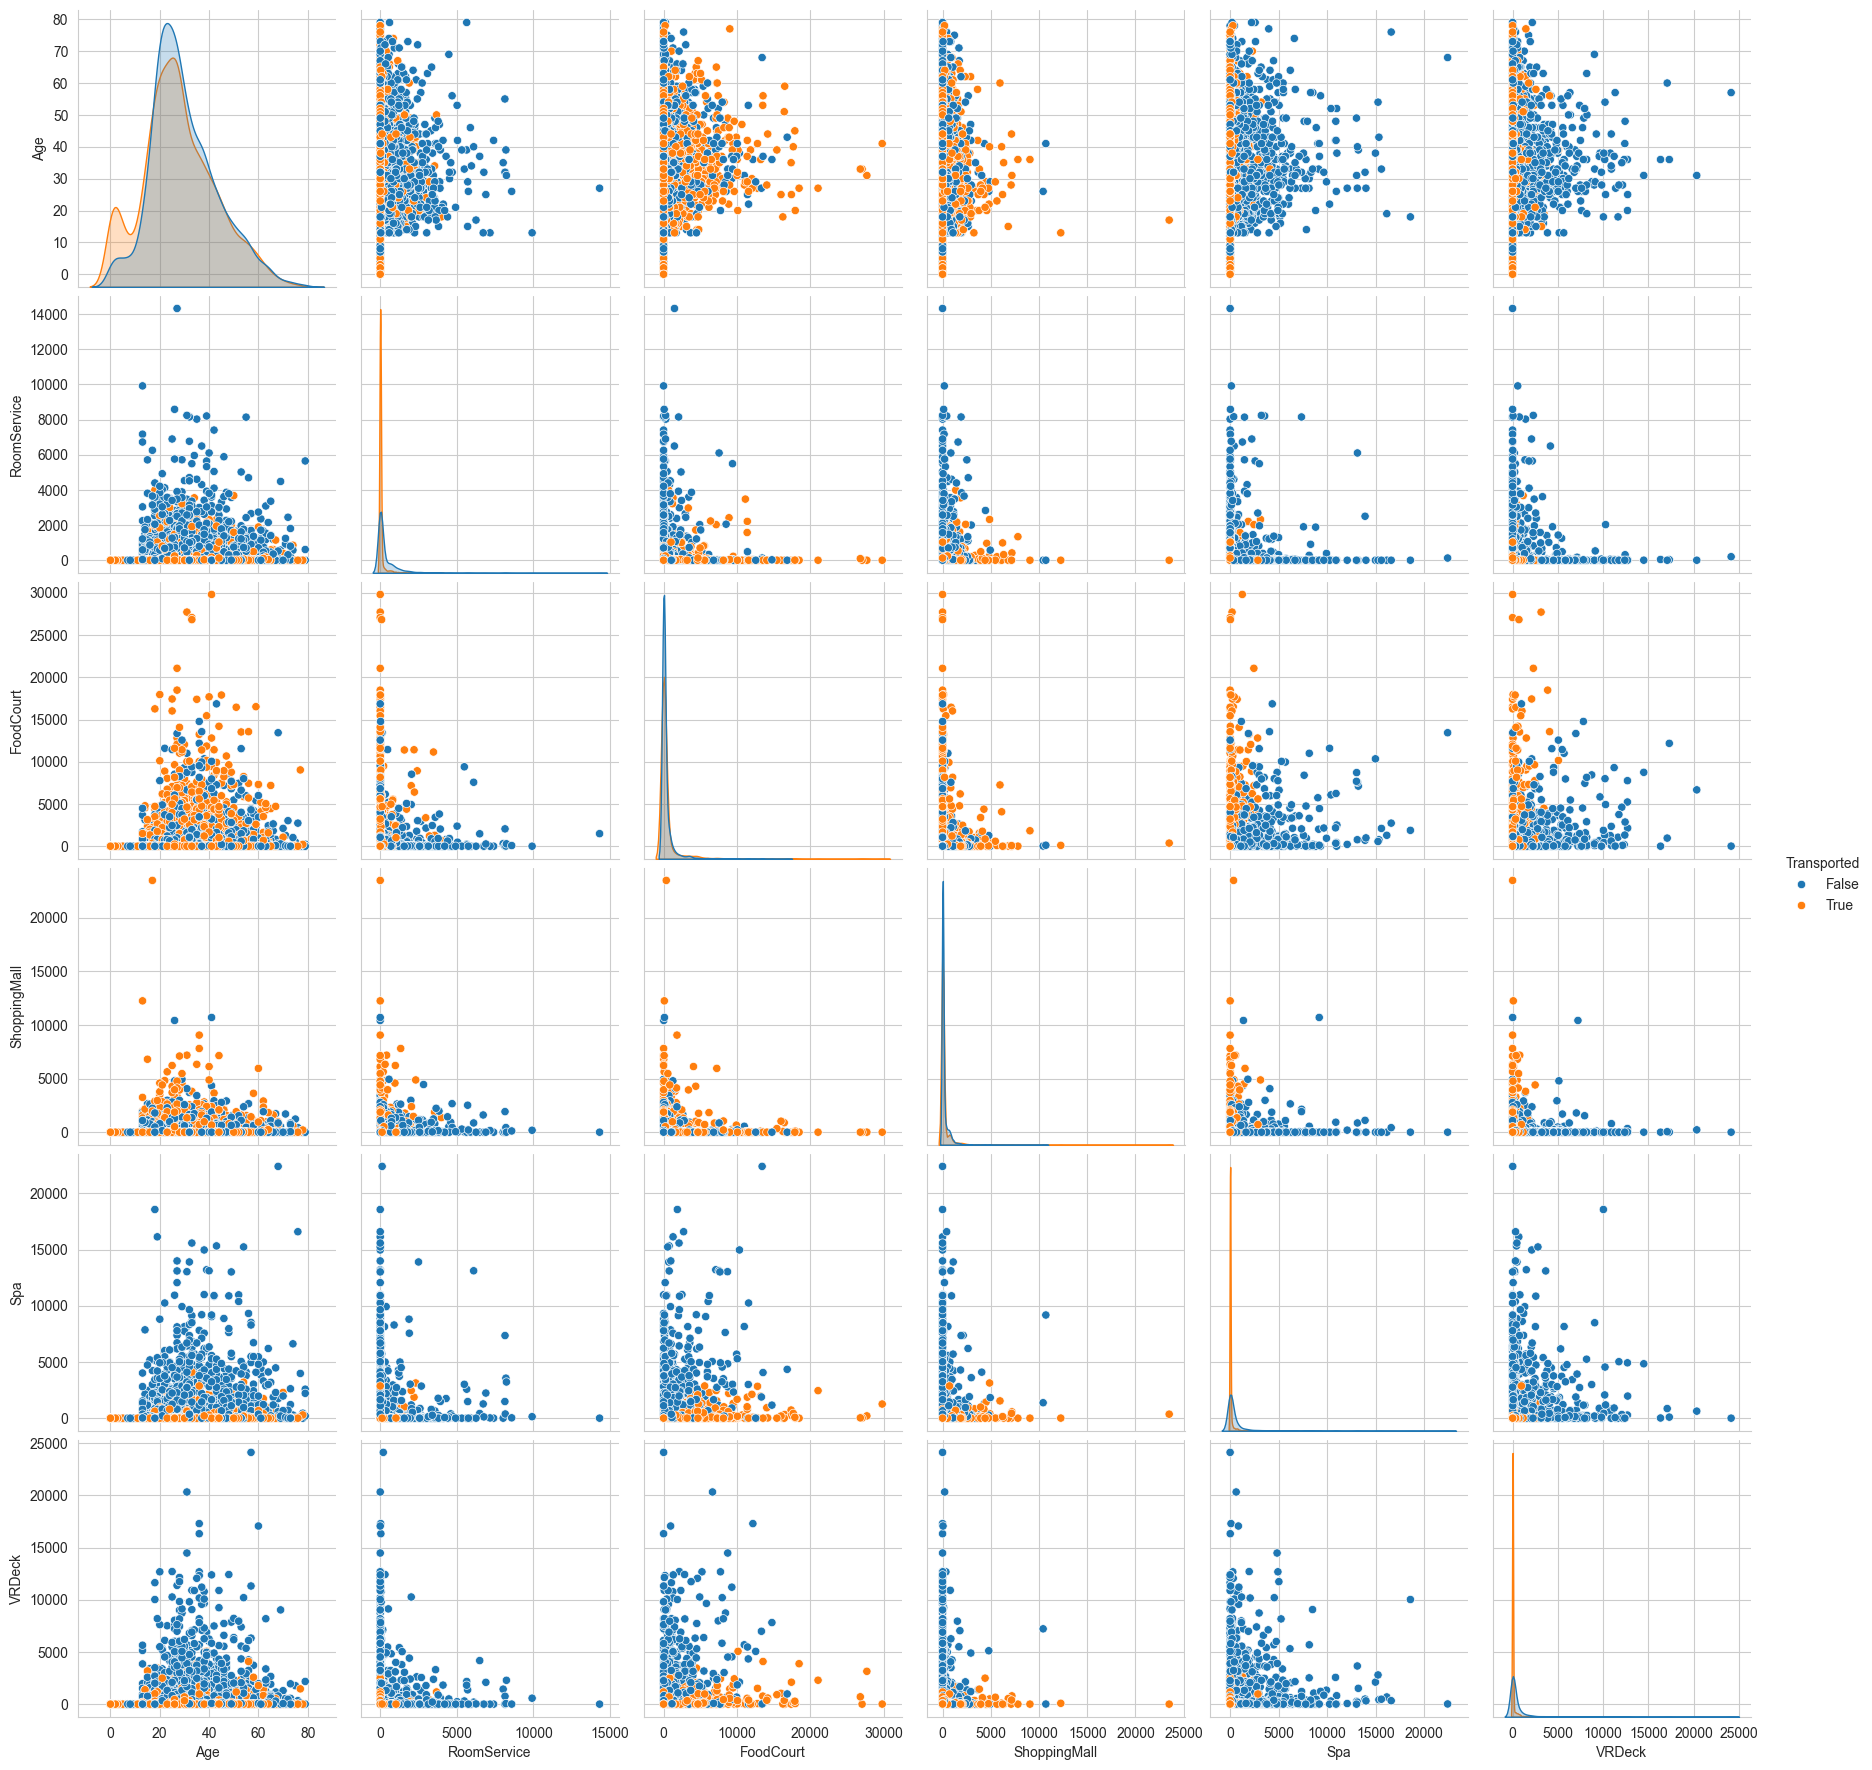

In [77]:
sns.set_style("whitegrid")
sns.pairplot(df2,hue="Transported",height=3);
plt.show()

In [82]:
feature_names = X_plot.columns

In [86]:
#k means based cluster or pair plot. visualization. not any prediction model


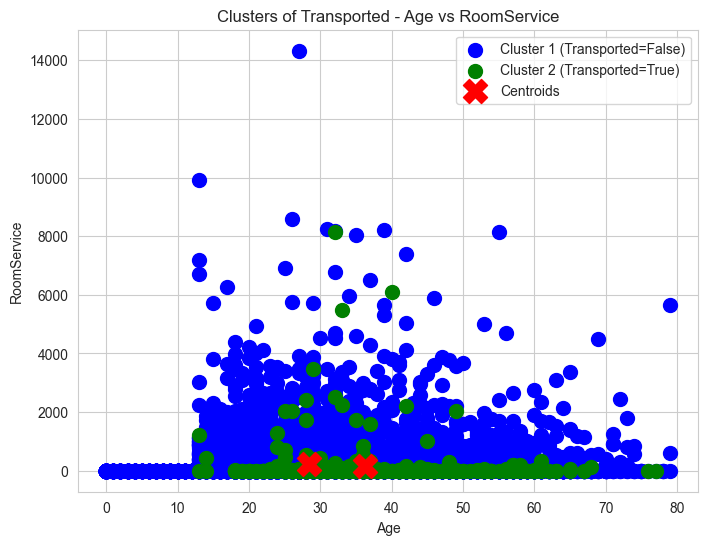

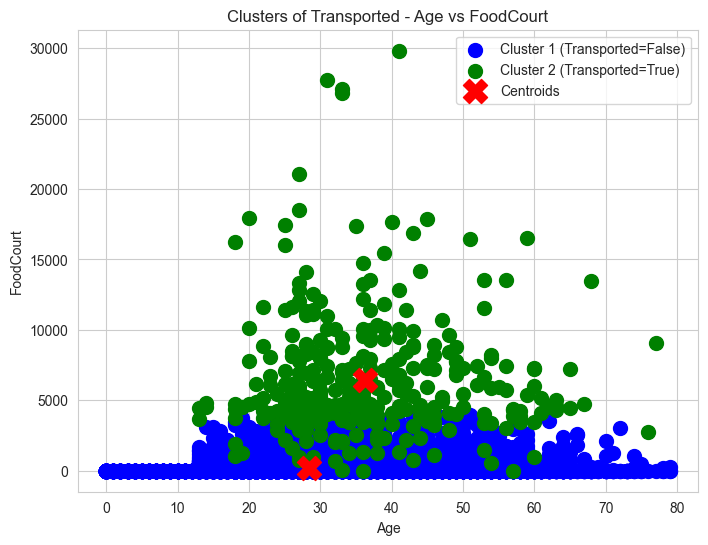

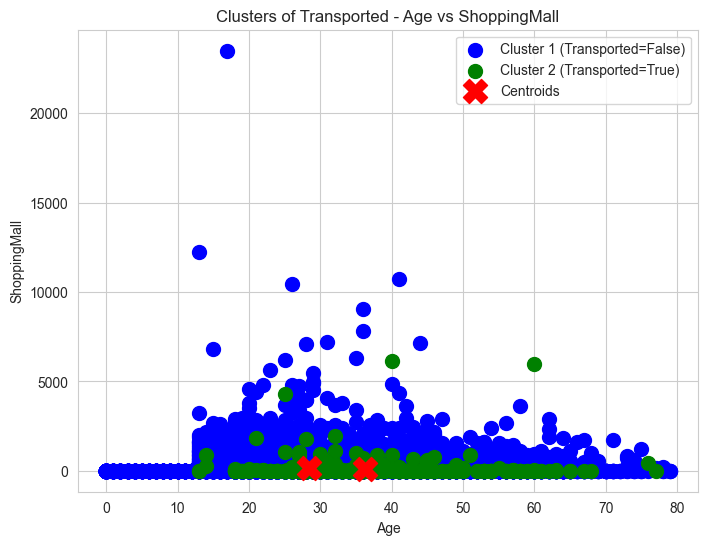

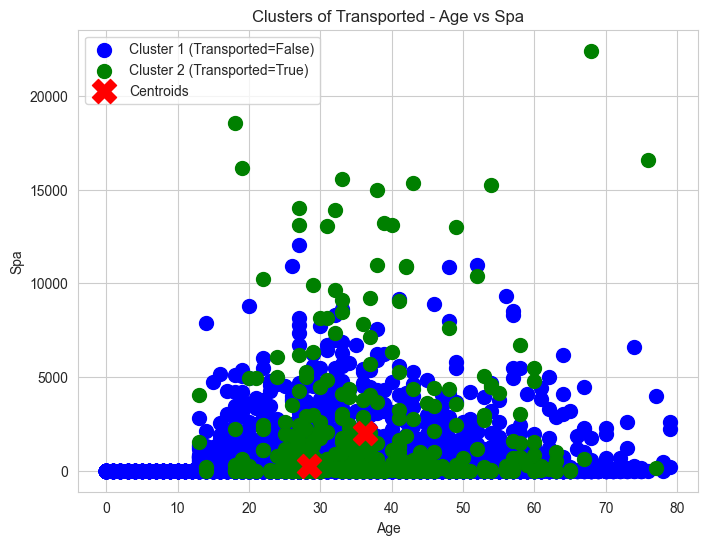

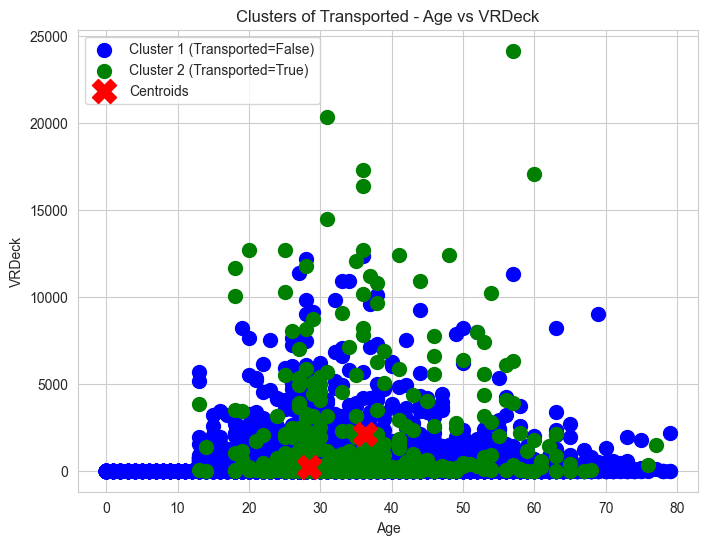

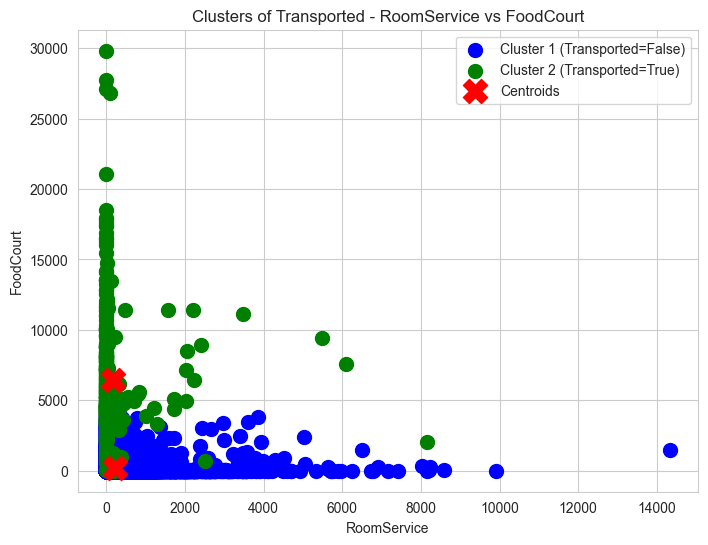

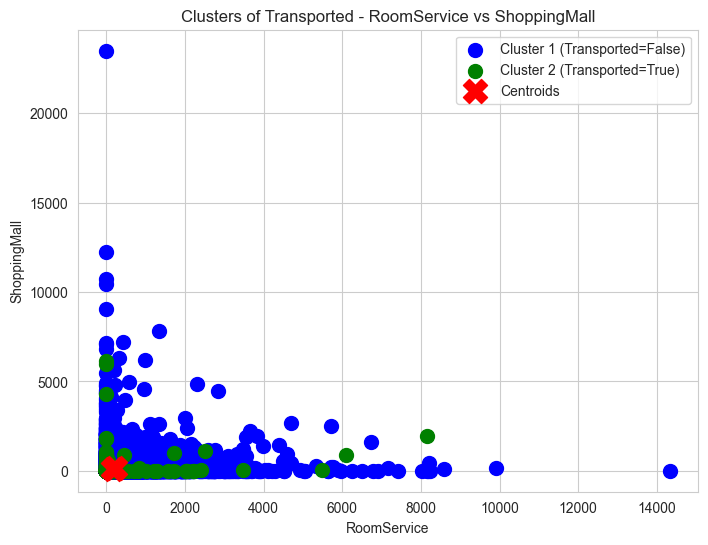

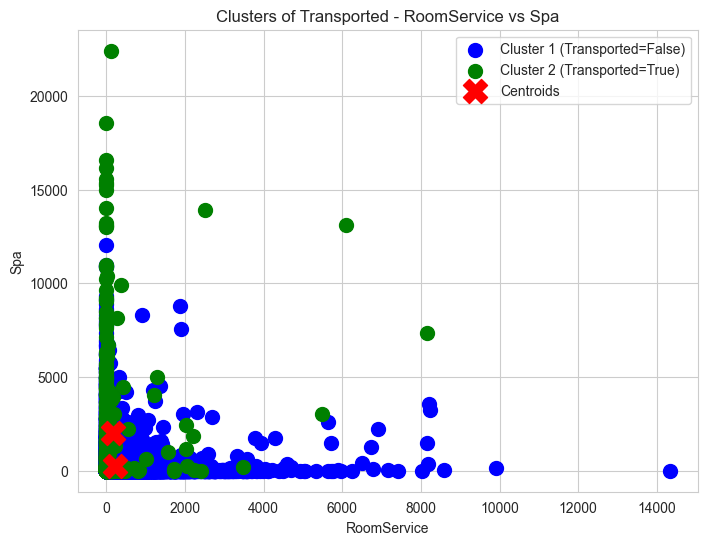

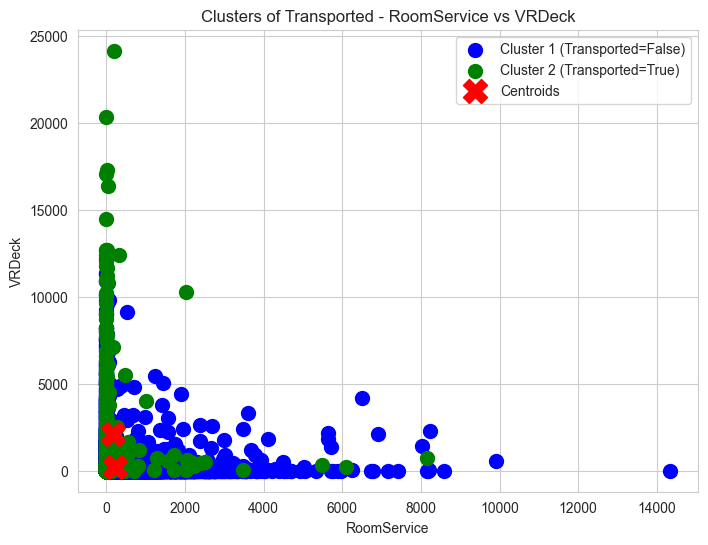

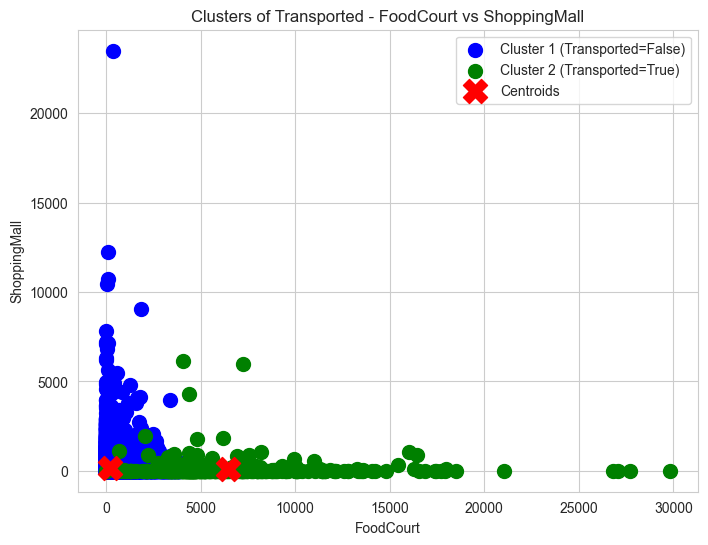

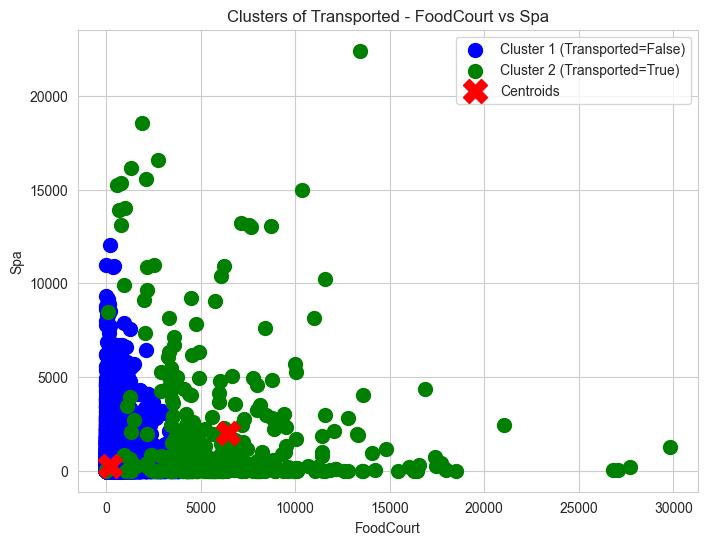

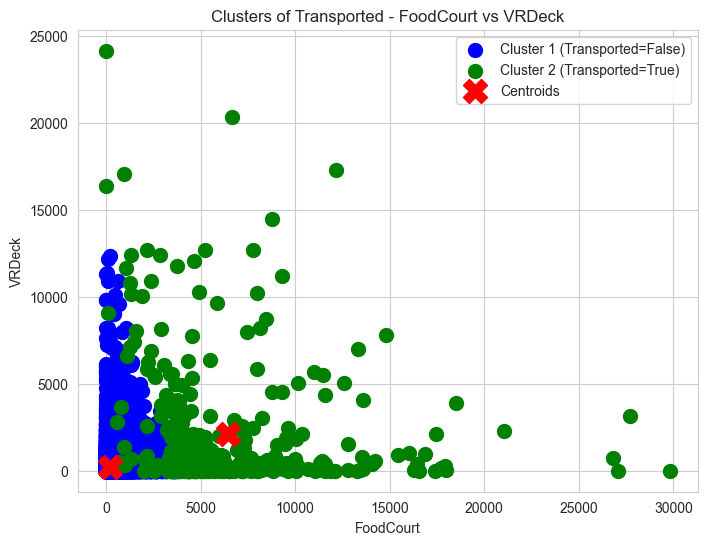

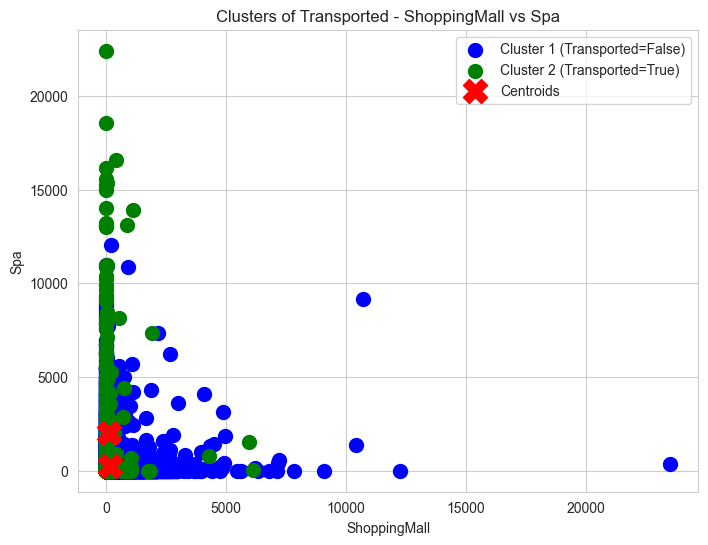

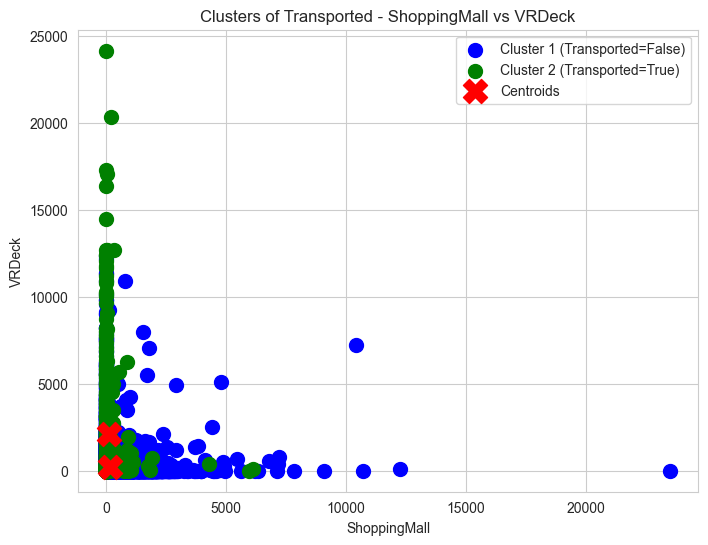

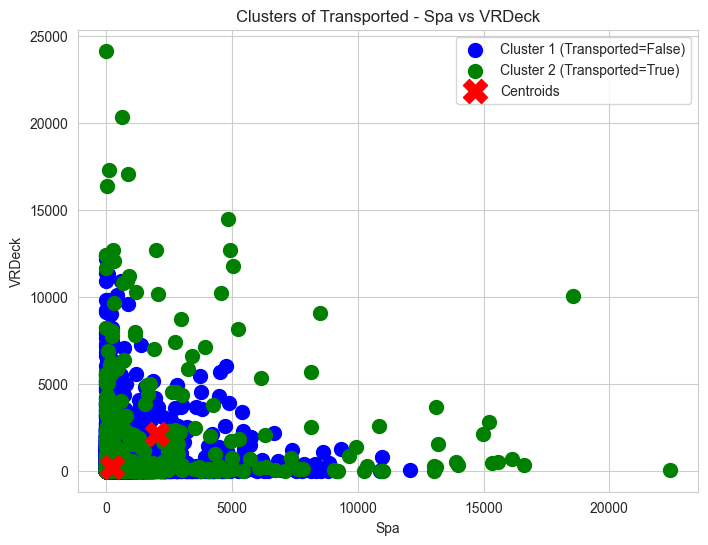

In [ ]:
import numpy as np

# Ensure X is a NumPy array
X_np = X_plot.to_numpy()

#------------ Perform K-means clustering-----------------------------------
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_np)

n_features = X_plot.shape[1]
for i in range(n_features):
    for j in range(i + 1, n_features):
        plt.figure(figsize=(8, 6))
        
        # Plot each cluster for the pair of features (i, j)
        plt.scatter(X_np[y_kmeans == 0, i], X_np[y_kmeans == 0, j], 
                    s=100, c='blue', label='Cluster 1')
        plt.scatter(X_np[y_kmeans == 1, i], X_np[y_kmeans == 1, j], 
                    s=100, c='green', label='Cluster 2')
        
        # Plot the centroids for the pair of features
        plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], 
                    s=300, c='red', marker='X', label='Centroids')
        # Set the title and labels with the corresponding feature names
        plt.title(f'Clusters of Transported - {feature_names[i]} vs {feature_names[j]}')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        plt.show()
   

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
y_train.value_counts()

Transported
True     3502
False    3452
Name: count, dtype: int64

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
skf = StratifiedKFold(n_splits = 3,shuffle =True, random_state=42)

In [ ]:
accuracies, precisions, recalls, f1s = [],[],[],[] 

In [ ]:
for train_index, val_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    knn.fit(X_train_fold,y_train_fold)
    y_predict = knn.predict(X_val_fold)

    accuracies.append(accuracy_score(y_val_fold,y_predict))
    precisions.append(precision_score(y_val_fold,y_predict))
    recalls.append(recall_score(y_val_fold,y_predict))
    f1s.append(f1_score(y_val_fold,y_predict))

In [ ]:
print("KNN Results:- ")
print(f"Accuracy: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} +/- {np.std(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f} +/- {np.std(recalls):.4f}")
print(f"F1 Score: {np.mean(f1s):.4f} +/- {np.std(f1s):.4f}")

KNN Results:- 
Accuracy: 0.7171 +/- 0.0056
Precision: 0.7186 +/- 0.0109
Recall: 0.7219 +/- 0.0374
F1 Score: 0.7195 +/- 0.0135


In [ ]:
print(classification_report(y_val_fold,y_predict))

              precision    recall  f1-score   support

       False       0.85      0.44      0.58      1151
        True       0.63      0.93      0.75      1167

    accuracy                           0.68      2318
   macro avg       0.74      0.68      0.66      2318
weighted avg       0.74      0.68      0.66      2318



In [ ]:
svm = SVC(kernel='rbf',probability=True)

In [ ]:
accuracies, precisions, recalls, f1s = [],[],[],[] 

In [ ]:
for train_index, val_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    svm.fit(X_train_fold,y_train_fold)
    y_predict = svm.predict(X_val_fold)

    accuracies.append(accuracy_score(y_val_fold,y_predict))
    precisions.append(precision_score(y_val_fold,y_predict))
    recalls.append(recall_score(y_val_fold,y_predict))
    f1s.append(f1_score(y_val_fold,y_predict))

In [ ]:
print("SVM Results:- ")
print(f"Accuracy: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} +/- {np.std(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f} +/- {np.std(recalls):.4f}")
print(f"F1 Score: {np.mean(f1s):.4f} +/- {np.std(f1s):.4f}")

SVM Results:- 
Accuracy: 0.7676 +/- 0.0101
Precision: 0.7367 +/- 0.0075
Recall: 0.8381 +/- 0.0136
F1 Score: 0.7841 +/- 0.0101


In [ ]:
print(classification_report(y_val_fold,y_predict))

              precision    recall  f1-score   support

       False       0.85      0.44      0.58      1151
        True       0.63      0.93      0.75      1167

    accuracy                           0.68      2318
   macro avg       0.74      0.68      0.66      2318
weighted avg       0.74      0.68      0.66      2318



In [ ]:
nb = GaussianNB()

In [ ]:
accuracies, precisions, recalls, f1s = [],[],[],[] 

for train_index, val_index in skf.split(X_train, y_train):
    
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    nb.fit(X_train_fold,y_train_fold)
    y_predict = nb.predict(X_val_fold)

    accuracies.append(accuracy_score(y_val_fold,y_predict))
    precisions.append(precision_score(y_val_fold,y_predict))
    recalls.append(recall_score(y_val_fold,y_predict))
    f1s.append(f1_score(y_val_fold,y_predict))

In [88]:
print("Naive Bayes Results:- ")
print(f"Accuracy: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} +/- {np.std(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f} +/- {np.std(recalls):.4f}")
print(f"F1 Score: {np.mean(f1s):.4f} +/- {np.std(f1s):.4f}")

print(classification_report(y_val_fold,y_predict))

Naive Bayes Results:- 
Accuracy: 0.7272 +/- 0.0090
Precision: 0.6944 +/- 0.0103
Recall: 0.8195 +/- 0.0319
F1 Score: 0.7514 +/- 0.0118
              precision    recall  f1-score   support

       False       0.80      0.63      0.71      1151
        True       0.70      0.85      0.77      1167

    accuracy                           0.74      2318
   macro avg       0.75      0.74      0.74      2318
weighted avg       0.75      0.74      0.74      2318



In [ ]:
accuracies, precisions, recalls, f1s = [],[],[],[] 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    dt.fit(X_train_fold,y_train_fold)
    y_predict = dt.predict(X_val_fold)
    
    accuracies.append(accuracy_score(y_val_fold,y_predict))
    precisions.append(precision_score(y_val_fold,y_predict))
    recalls.append(recall_score(y_val_fold,y_predict))
    f1s.append(f1_score(y_val_fold,y_predict))

In [ ]:
print("Decision Tree Results:- ")
print(f"Accuracy: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} +/- {np.std(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f} +/- {np.std(recalls):.4f}")
print(f"F1 Score: {np.mean(f1s):.4f} +/- {np.std(f1s):.4f}")

print(classification_report(y_val_fold,y_predict))

Naive Bayes Results:- 
Accuracy: 0.7272 +/- 0.0090
Precision: 0.6944 +/- 0.0103
Recall: 0.8195 +/- 0.0319
F1 Score: 0.7514 +/- 0.0118
              precision    recall  f1-score   support

       False       0.80      0.63      0.71      1151
        True       0.70      0.85      0.77      1167

    accuracy                           0.74      2318
   macro avg       0.75      0.74      0.74      2318
weighted avg       0.75      0.74      0.74      2318



In [89]:
accuracies, precisions, recalls, f1s = [],[],[],[] 

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf.fit(X_train_fold,y_train_fold)
    y_predict = rf.predict(X_val_fold)
    
    accuracies.append(accuracy_score(y_val_fold,y_predict))
    precisions.append(precision_score(y_val_fold,y_predict))
    recalls.append(recall_score(y_val_fold,y_predict))
    f1s.append(f1_score(y_val_fold,y_predict))

In [90]:
print("Random Forest Results:- ")
print(f"Accuracy: {np.mean(accuracies):.4f} +/- {np.std(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f} +/- {np.std(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f} +/- {np.std(recalls):.4f}")
print(f"F1 Score: {np.mean(f1s):.4f} +/- {np.std(f1s):.4f}")

print(classification_report(y_val_fold,y_predict))

Random Forest Results:- 
Accuracy: 0.7545 +/- 0.0064
Precision: 0.7241 +/- 0.0051
Recall: 0.8281 +/- 0.0121
F1 Score: 0.7726 +/- 0.0069
              precision    recall  f1-score   support

       False       0.81      0.67      0.74      1151
        True       0.72      0.84      0.78      1167

    accuracy                           0.76      2318
   macro avg       0.77      0.76      0.76      2318
weighted avg       0.77      0.76      0.76      2318

